### 1) Problem Statement is to build a predictive model and find out the sales of each product at a particular store.

### 2) Hypothesis Generation: 
#### The sales performance of Bigmart stores located in highly populated areas with a high percentage of middle-income families is expected to be better than those located in less populated areas with a low percentage of middle-income families.

### 3) Loading Packages and Data:

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import datetime
from random import sample
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import warnings
import scipy.stats as stats
import pylab
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [2]:
df = pd.read_csv('Train.csv')

In [3]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mode()[0])
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [6]:
df['Item_Weight'] = df['Item_Weight'].astype(int)
df['Item_Visibility'] = df['Item_Visibility'].astype(int)
df['Item_MRP'] = df['Item_MRP'].astype(int)
df['Item_Outlet_Sales'] = df['Item_Outlet_Sales'].astype(int)

### 4) Data Structure and Content Data in this visualization always helps to understand the data easily. Python has libraries like matplotlib and seaborn to create multiple graphs effectively. Let’s look at the some of the visualizations to understand below behavior of variables.

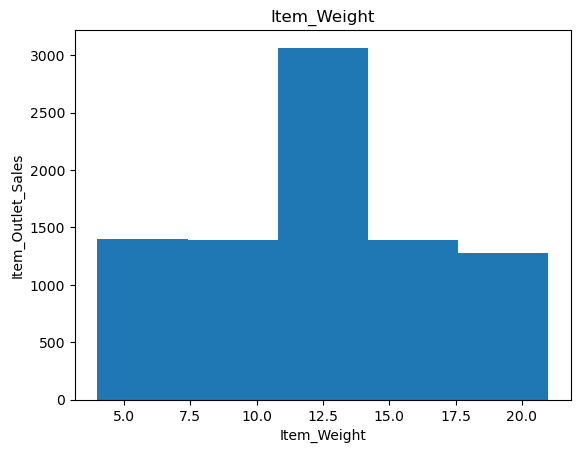

In [7]:
# Plot Histogram
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(df['Item_Weight'],bins = 5)
plt.title('Item_Weight')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.show()

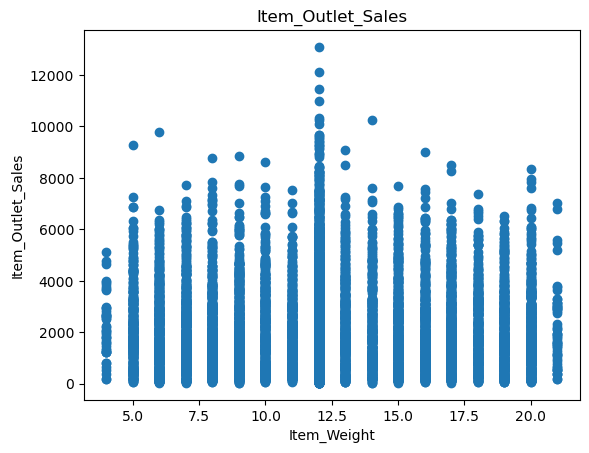

In [8]:
#Scatter plot
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df['Item_Weight'],df['Item_Outlet_Sales'])
plt.title('Item_Outlet_Sales')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.show()

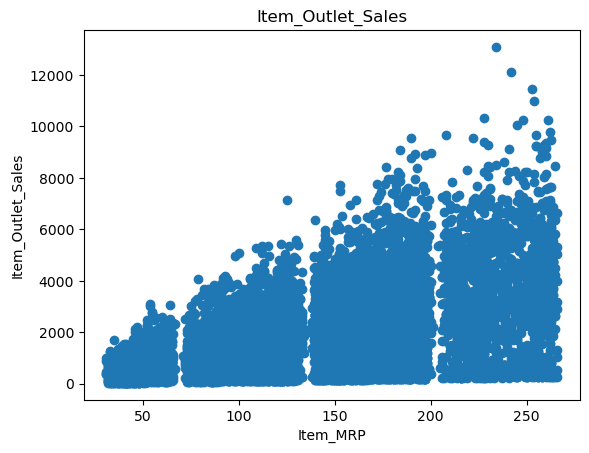

In [9]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df['Item_MRP'],df['Item_Outlet_Sales'])
plt.title('Item_Outlet_Sales')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

C:\Users\Swapnil Mukwane\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


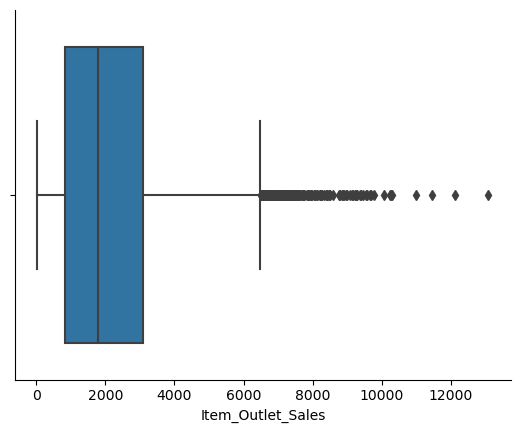

In [10]:
# Box Plot
sns.boxplot(df['Item_Outlet_Sales'])
sns.despine()

C:\Users\Swapnil Mukwane\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


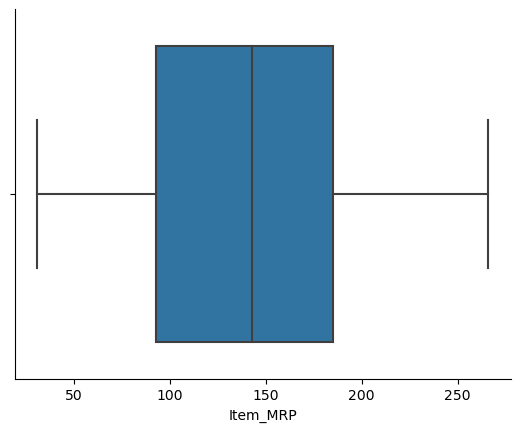

In [11]:
sns.boxplot(df['Item_MRP'])
sns.despine()

C:\Users\Swapnil Mukwane\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


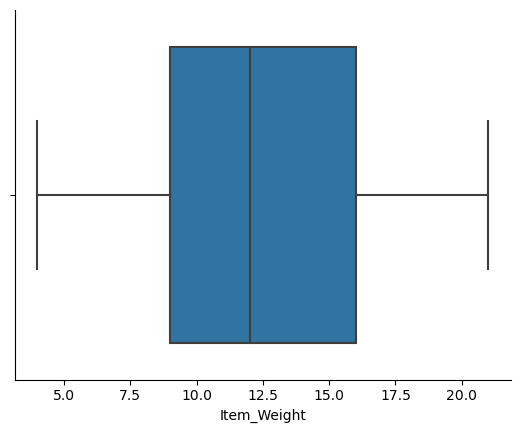

In [12]:
sns.boxplot(df['Item_Weight'])
sns.despine()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Item_Identifier            8523 non-null   object
 1   Item_Weight                8523 non-null   int32 
 2   Item_Fat_Content           8523 non-null   object
 3   Item_Visibility            8523 non-null   int32 
 4   Item_Type                  8523 non-null   object
 5   Item_MRP                   8523 non-null   int32 
 6   Outlet_Identifier          8523 non-null   object
 7   Outlet_Establishment_Year  8523 non-null   int64 
 8   Outlet_Size                8523 non-null   object
 9   Outlet_Location_Type       8523 non-null   object
 10  Outlet_Type                8523 non-null   object
 11  Item_Outlet_Sales          8523 non-null   int32 
dtypes: int32(4), int64(1), object(7)
memory usage: 666.0+ KB


In [14]:
#Frequency Tables can be used to understand the distribution of a categorical variable or n categorical variables using frequency tables.
test= df.groupby(['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type'])
test.size()

Item_Identifier  Item_Fat_Content  Item_Type    Outlet_Identifier  Outlet_Size  Outlet_Location_Type  Outlet_Type      
DRA12            LF                Soft Drinks  OUT035             Small        Tier 2                Supermarket Type1    1
                 Low Fat           Soft Drinks  OUT010             Medium       Tier 3                Grocery Store        1
                                                OUT013             High         Tier 3                Supermarket Type1    1
                                                OUT017             Medium       Tier 2                Supermarket Type1    1
                                                OUT018             Medium       Tier 3                Supermarket Type2    1
                                                                                                                          ..
NCZ54            Low Fat           Household    OUT019             Small        Tier 1                Grocery Store        1
     

In [15]:
#Create Sample dataframe
rindex = np.random.choice(df.index, size=5, replace=False)
sample_df = df.loc[rindex]
print(sample_df)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
976            FDU22           12          Low Fat                0   
4180           FDL48           12          Regular                0   
3302           DRH36           16          Low Fat                0   
6183           DRN37            9          Low Fat                0   
6737           FDO24           11          low fat                0   

         Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
976    Snack Foods       120            OUT019                       1985   
4180  Baking Goods        46            OUT027                       1985   
3302   Soft Drinks        73            OUT045                       2002   
6183   Soft Drinks       166            OUT049                       1999   
6737  Baking Goods       156            OUT049                       1999   

     Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
976        Small               T

In [16]:
sample_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
976,FDU22,12,Low Fat,0,Snack Foods,120,OUT019,1985,Small,Tier 1,Grocery Store,474
4180,FDL48,12,Regular,0,Baking Goods,46,OUT027,1985,Medium,Tier 3,Supermarket Type3,1069
3302,DRH36,16,Low Fat,0,Soft Drinks,73,OUT045,2002,Medium,Tier 2,Supermarket Type1,894
6183,DRN37,9,Low Fat,0,Soft Drinks,166,OUT049,1999,Medium,Tier 1,Supermarket Type1,3509
6737,FDO24,11,low fat,0,Baking Goods,156,OUT049,1999,Medium,Tier 1,Supermarket Type1,2376


In [17]:
test= df.groupby(['Outlet_Location_Type'])
test.describe()

Item_Weight                                              \
                           count       mean       std  min   25%   50%   75%   
Outlet_Location_Type                                                           
Tier 1                    2388.0  12.342965  4.143130  4.0   9.0  12.0  15.0   
Tier 2                    2785.0  12.307361  4.635527  4.0   8.0  12.0  16.0   
Tier 3                    3350.0  12.340000  3.993565  4.0  10.0  12.0  15.0   

                           Item_Visibility       ...  \
                       max           count mean  ...   
Outlet_Location_Type                             ...   
Tier 1                21.0          2388.0  0.0  ...   
Tier 2                21.0          2785.0  0.0  ...   
Tier 3                21.0          3350.0  0.0  ...   

                     Outlet_Establishment_Year         Item_Outlet_Sales  \
                                           75%     max             count   
Outlet_Location_Type                                                       
Tier 1                                  1999.0  1999.0            2388.0   
Tier 2                                  2007.0  2007.0            2785.0   
Tier 3                                  2009.0  2009.0            3350.0   

                                                                       \
                             mean          std   min      25%     50%   
Outlet_Location_Type                                                    
Tier 1                1876.400335  1561.643672  33.0   593.00  1487.0   
Tier 2                2323.493716  1520.537609  99.0  1171.00  2004.0   
Tier 3                2279.125373  1912.452094  33.0   731.25  1811.5   

                                        
                          75%      max  
Outlet_Location_Type                    
Tier 1                2802.75   9779.0  
Tier 2                3110.00   9664.0  
Tier 3                3307.00  13086.0  

[3 rows x 40 columns]

### 5) Exploratory Data Analysis

In [18]:
df.shape

(8523, 12)

In [19]:
# check for duplicate data
duplicate = df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [20]:
#Remove outlier(col)
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range = Q1-(1.5 * IQR)
    upper_range = Q3+(1.5 * IQR)
    return lower_range,upper_range

In [21]:
lower_range,upper_range = remove_outlier(df['Item_Outlet_Sales'])
df['Item_Outlet_Sales']=np.where(df['Item_Outlet_Sales']>upper_range,upper_range,df['Item_Outlet_Sales'])
df['Item_Outlet_Sales']=np.where(df['Item_Outlet_Sales']<lower_range,lower_range,df['Item_Outlet_Sales'])

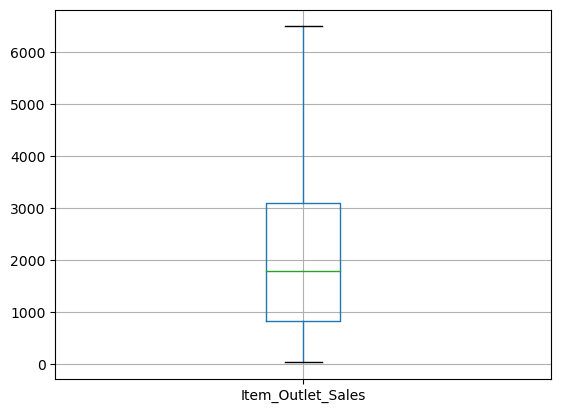

In [22]:
df.boxplot(column=['Item_Outlet_Sales'])
plt.show()

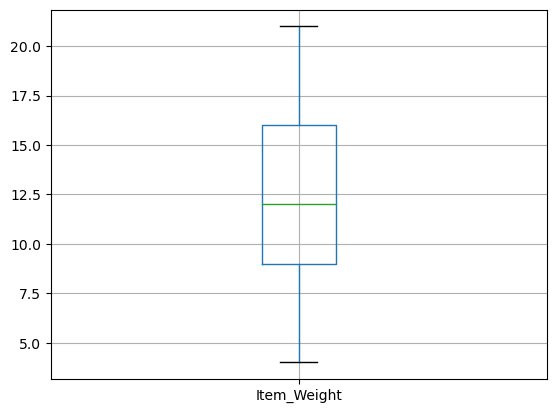

In [23]:
lower_range,upper_range = remove_outlier(df['Item_Weight'])
df['Item_Weight']=np.where(df['Item_Weight']>upper_range,upper_range,df['Item_Weight'])
df['Item_Weight']=np.where(df['Item_Weight']<lower_range,lower_range,df['Item_Weight'])
df.boxplot(column=['Item_Weight'])
plt.show()

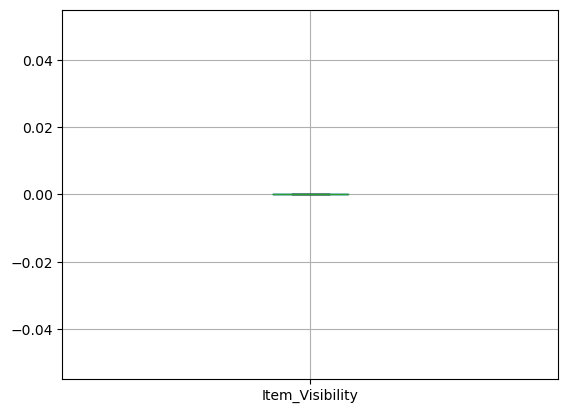

In [24]:
lower_range,upper_range = remove_outlier(df['Item_Visibility'])
df['Item_Visibility']=np.where(df['Item_Visibility']>upper_range,upper_range,df['Item_Visibility'])
df['Item_Visibility']=np.where(df['Item_Visibility']<lower_range,lower_range,df['Item_Visibility'])
df.boxplot(column=['Item_Visibility'])
plt.show()

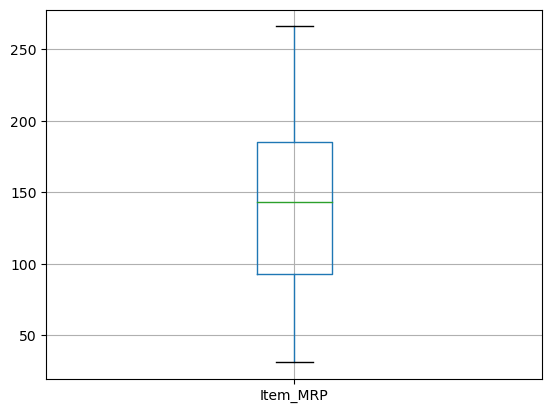

In [25]:
lower_range,upper_range = remove_outlier(df['Item_MRP'])
df['Item_MRP']=np.where(df['Item_MRP']>upper_range,upper_range,df['Item_MRP'])
df['Item_MRP']=np.where(df['Item_MRP']<lower_range,lower_range,df['Item_MRP'])
df.boxplot(column=['Item_MRP'])
plt.show()

### 6) Univariate Analysis

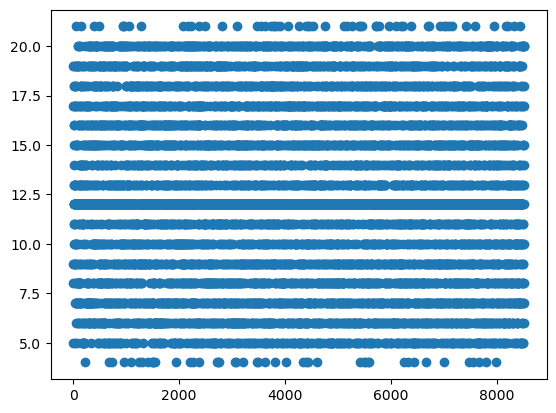

In [26]:
plt.scatter(df.index,df['Item_Weight'])
plt.show()

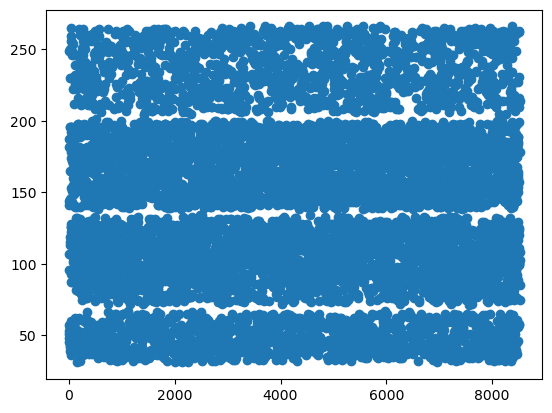

In [27]:
plt.scatter(df.index,df['Item_MRP'])
plt.show()

<AxesSubplot:ylabel='Item_MRP'>

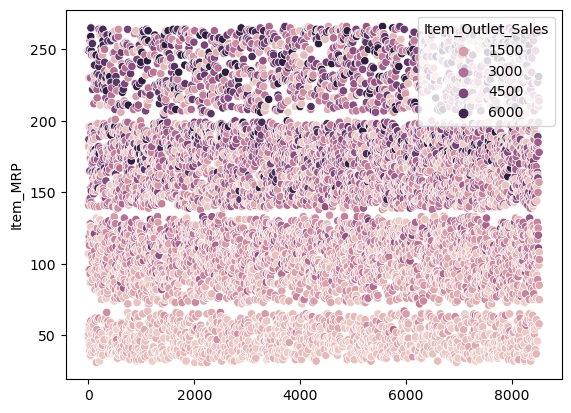

In [28]:
sns.scatterplot(x=df.index,y=df['Item_MRP'],hue=df['Item_Outlet_Sales'])

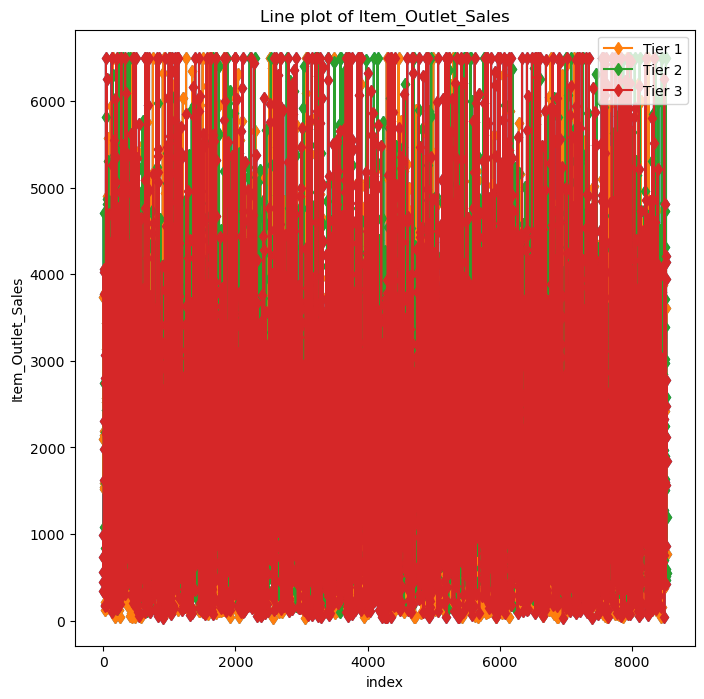

In [29]:
#Line Plot
plt.figure(figsize=(8,8))
plt.title('Line plot of Item_Outlet_Sales')
plt.xlabel('index',fontsize = 10)
plt.ylabel('Item_Outlet_Sales',fontsize=10)
plt.plot(df.index,df['Item_Outlet_Sales'],markevery=1,marker='d')
for name,group in df.groupby('Outlet_Location_Type'):
    plt.plot(group.index, group['Item_Outlet_Sales'], label = name,markevery = 1,marker ='d')
plt.legend()
plt.show()

<AxesSubplot:ylabel='Item_Outlet_Sales'>

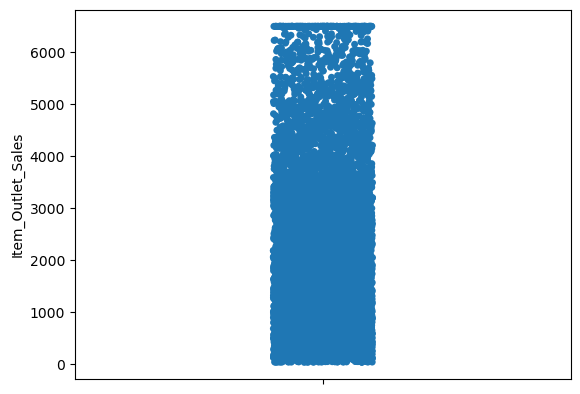

In [30]:
sns.stripplot(y=df['Item_Outlet_Sales'])

(array([1744., 1512., 1370., 1071.,  911.,  624.,  425.,  315.,  221.,
         330.]),
 array([  33.   ,  679.925, 1326.85 , 1973.775, 2620.7  , 3267.625,
        3914.55 , 4561.475, 5208.4  , 5855.325, 6502.25 ]),
 <BarContainer object of 10 artists>)

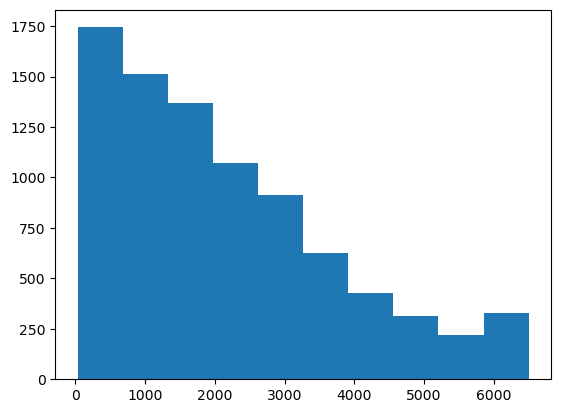

In [31]:
#Histograms:
plt.hist(df['Item_Outlet_Sales'])

C:\Users\Swapnil Mukwane\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales'>

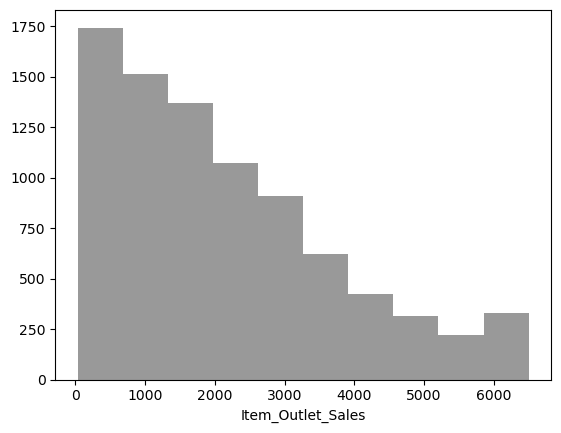

In [32]:
sns.distplot(df['Item_Outlet_Sales'],kde=False,color='black',bins=10)

C:\Users\Swapnil Mukwane\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

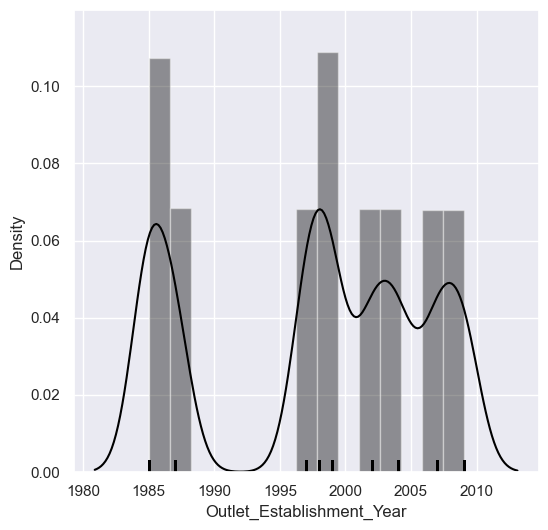

In [33]:
#Distplot
sns.set(rc={'figure.figsize':(6,6)})
sns.distplot(df['Outlet_Establishment_Year'],color='black',rug=True)

<AxesSubplot:>

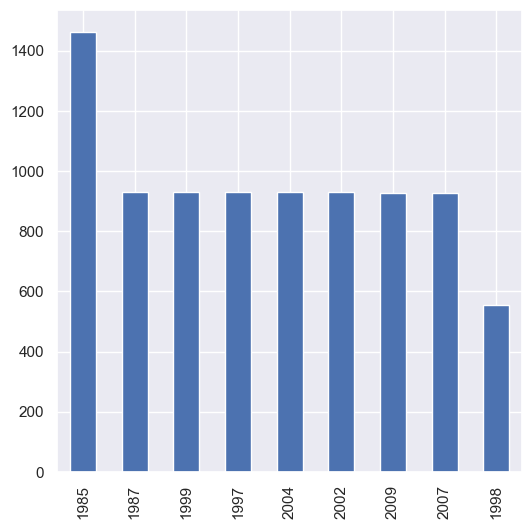

In [34]:
#Bar chart
df['Outlet_Establishment_Year'].value_counts().plot.bar()

C:\Users\Swapnil Mukwane\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

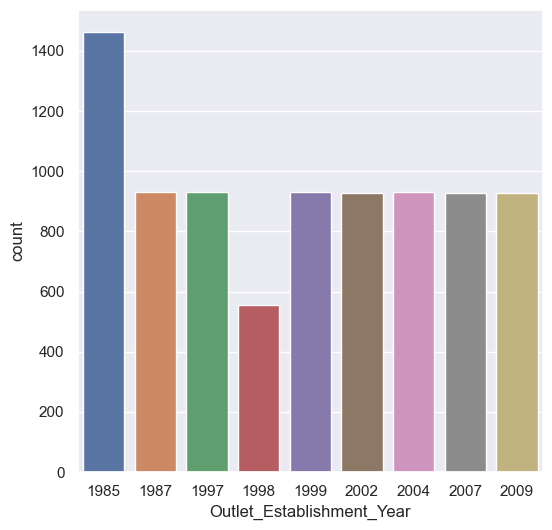

In [35]:
sns.countplot(df['Outlet_Establishment_Year'])

### 7) Bivariate analysis

In [36]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,NaN,0.025309,0.016347,0.010574
Item_Visibility,NaN,NaN,NaN,NaN,NaN
Item_MRP,0.025309,NaN,1.000000,0.005106,0.574490
Outlet_Establishment_Year,0.016347,NaN,0.005106,1.000000,-0.037140
Item_Outlet_Sales,0.010574,NaN,0.574490,-0.037140,1.000000


In [37]:
#Scales the data. Essentially returns the z-scores of every attribute 
#z-score called as a standard score it gives the idea about how far from the mean a data point is.
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [38]:
df['Item_Weight'] = std_scale.fit_transform(df[['Item_Weight']])
df['Item_MRP'] = std_scale.fit_transform(df[['Item_MRP']])
df['Outlet_Establishment_Year'] = std_scale.fit_transform(df[['Outlet_Establishment_Year']])
df['Item_Outlet_Sales'] = std_scale.fit_transform(df[['Item_Outlet_Sales']])

In [39]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,-0.782897,Low Fat,0.0,Dairy,1.742452,OUT049,0.139541,Medium,Tier 1,Supermarket Type1,0.971907
1,DRC01,-1.723267,Regular,0.0,Soft Drinks,-1.485342,OUT018,1.334103,Medium,Tier 3,Supermarket Type2,-1.054168
2,FDN15,1.097843,Low Fat,0.0,Meat,0.008115,OUT049,0.139541,Medium,Tier 1,Supermarket Type1,-0.036207
3,FDX07,1.568028,Regular,0.0,Fruits and Vegetables,0.666521,OUT010,0.020085,Medium,Tier 3,Grocery Store,-0.876302
4,NCD19,-1.017989,Low Fat,0.0,Household,-1.405049,OUT013,-1.293934,High,Tier 3,Supermarket Type1,-0.715053


### 8) Feature Engineering:

In [40]:
#cols_reqiuired = (['Item_Weight', 'Item_MRP', 'Item_Outlet_Sales'])
#df[cols_reqiuired].head()

#def plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)
    plt.show()
plots(df, 'Item_MRP')

df['Item_MRP_log'] = np.log(df.Item_MRP)
plots(df, 'Item_MRP_log')

df['Item_MRP_sqr'] =df.Item_MRP**(1/2)
plots(df, 'Item_MRP_sqr')

df['Item_MRP_reciprocal'] = 1 / df.Item_MRP
plots(df, 'Item_MRP_reciprocal')

df['Item_MRP_exp'] = df.Item_MRP**(1/1.2) 
plots(df, 'Item_MRP_exp')

### 9) ENCODING:

In [41]:
le = LabelEncoder()

In [42]:
df['Item_Fat_Content'] = le.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = le.fit_transform(df['Item_Type'])
df['Outlet_Size'] = le.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = le.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = le.fit_transform(df['Outlet_Type'])
df['Outlet_Identifier'] = le.fit_transform(df['Outlet_Identifier'])

In [43]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,-0.782897,1,0.0,4,1.742452,9,0.139541,1,0,1,0.971907
1,DRC01,-1.723267,2,0.0,14,-1.485342,3,1.334103,1,2,2,-1.054168
2,FDN15,1.097843,1,0.0,10,0.008115,9,0.139541,1,0,1,-0.036207
3,FDX07,1.568028,2,0.0,6,0.666521,0,0.020085,1,2,0,-0.876302
4,NCD19,-1.017989,1,0.0,9,-1.405049,1,-1.293934,0,2,1,-0.715053


### 10) Data Modeling

In [44]:
model = LinearRegression()

In [45]:
df.drop('Item_Identifier', axis = 1, inplace = True)

In [46]:
df['Item_Weight'] = df['Item_Weight'].astype(int)
df['Item_Visibility'] = df['Item_Visibility'].astype(int)
df['Item_MRP'] = df['Item_MRP'].astype(int)
df['Item_Outlet_Sales'] = df['Item_Outlet_Sales'].astype(int)
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype(int)

In [47]:
x = df.drop('Item_Outlet_Sales', axis = 1)
y = df['Item_Outlet_Sales']

In [48]:
model.fit(x, y)

LinearRegression()

In [49]:
model = LinearRegression().fit(x, y)

In [50]:
r_sq = model.score(x, y)

In [51]:
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.3691944787196736


In [52]:
print(f"intercept: {model.intercept_}")

intercept: -0.3076291065642008


In [53]:
print(f"slope: {model.coef_}")

slope: [ 2.21061005e-04  2.22449422e-02  5.55111512e-17  1.88149727e-03
  4.60648072e-01  4.09265169e-02  3.46930010e-02 -1.79752456e-01
 -7.98880644e-02  3.64354145e-01]


In [54]:
y_pred = model.predict(x)

In [55]:
print(f"predicted response:\n{y_pred}")

predicted response:
[ 0.73573024 -0.15101514  0.28659221 ... -0.09981192  0.30775144
 -0.38742991]


In [56]:
y_pred = model.intercept_ + model.coef_ * x

In [57]:
print(f"predicted response:\n{y_pred}")

predicted response:
      Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0       -0.307629         -0.285384        -0.307629  -0.300103  0.153019   
1       -0.307850         -0.263139        -0.307629  -0.281288 -0.768277   
2       -0.307408         -0.285384        -0.307629  -0.288814 -0.307629   
3       -0.307408         -0.263139        -0.307629  -0.296340 -0.307629   
4       -0.307850         -0.285384        -0.307629  -0.290696 -0.768277   
...           ...               ...              ...        ...       ...   
8518    -0.307850         -0.285384        -0.307629  -0.283170  0.153019   
8519    -0.307850         -0.263139        -0.307629  -0.307629 -0.307629   
8520    -0.307629         -0.285384        -0.307629  -0.292577 -0.307629   
8521    -0.307850         -0.263139        -0.307629  -0.283170 -0.307629   
8522    -0.307629         -0.285384        -0.307629  -0.281288 -0.768277   

      Outlet_Identifier  Outlet_Establishment_Year  Out

In [58]:
x_new = np.arange(10).reshape((-10, 10))

In [59]:
x_new

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [60]:
y_new = model.predict(x_new)

C:\Users\Swapnil Mukwane\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [61]:
y_new

array([3.3574588])

In [62]:
x, y = np.array(x), np.array(y)

In [63]:
x

array([[ 0,  1,  0, ...,  1,  0,  1],
       [-1,  2,  0, ...,  1,  2,  2],
       [ 1,  1,  0, ...,  1,  0,  1],
       ...,
       [ 0,  1,  0, ...,  2,  1,  1],
       [-1,  2,  0, ...,  1,  2,  2],
       [ 0,  1,  0, ...,  2,  0,  1]])

In [64]:
y

array([ 0, -1,  0, ...,  0,  0,  0])

In [65]:
model = LinearRegression().fit(x, y)

In [66]:
r_sq = model.score(x, y)

In [67]:
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.3691944787196736


In [68]:
print(f"intercept: {model.intercept_}")

intercept: -0.3076291065642008


In [69]:
print(f"coefficients: {model.coef_}")

coefficients: [ 2.21061005e-04  2.22449422e-02  5.55111512e-17  1.88149727e-03
  4.60648072e-01  4.09265169e-02  3.46930010e-02 -1.79752456e-01
 -7.98880644e-02  3.64354145e-01]


In [70]:
y_pred = model.predict(x)

In [71]:
print(f"predicted response:\n{y_pred}")

predicted response:
[ 0.73573024 -0.15101514  0.28659221 ... -0.09981192  0.30775144
 -0.38742991]


In [72]:
y_pred = model.intercept_ + np.sum(model.coef_ * x, axis=1)

In [73]:
print(f"predicted response:\n{y_pred}")

predicted response:
[ 0.73573024 -0.15101514  0.28659221 ... -0.09981192  0.30775144
 -0.38742991]


In [81]:
x_new = np.arange(10).reshape((-5, 10))

In [82]:
x_new

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [83]:
y_new = model.predict(x_new)

In [84]:
y_new

array([3.3574588])

Polynomial Regression With scikit-learn

In [86]:
transformer = PolynomialFeatures(degree=2, include_bias=False)

In [87]:
transformer.fit(x)

PolynomialFeatures(include_bias=False)

In [88]:
x_ = transformer.transform(x)

In [89]:
x_

array([[ 0.,  1.,  0., ...,  0.,  0.,  1.],
       [-1.,  2.,  0., ...,  4.,  4.,  4.],
       [ 1.,  1.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 0.,  1.,  0., ...,  1.,  1.,  1.],
       [-1.,  2.,  0., ...,  4.,  4.,  4.],
       [ 0.,  1.,  0., ...,  0.,  0.,  1.]])

In [90]:
model = LinearRegression().fit(x_, y)

In [91]:
r_sq = model.score(x_, y)

In [93]:
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.44977281059053165


In [94]:
print(f"intercept: {model.intercept_}")

intercept: -0.25035534069970605


In [95]:
print(f"coefficients: {model.coef_}")

coefficients: [-3.66717381e-02  2.35128870e-02 -8.00574884e-16 -4.46651044e-03
  3.35658179e-01  4.36873445e-02 -3.23562106e-02 -6.70915822e-02
 -2.16080275e-02  1.26758792e-01 -1.95871784e-02 -1.39584473e-02
 -2.51534904e-16  4.06690089e-04 -1.29039824e-04  5.63149636e-03
  2.27292004e-02  1.23079838e-02  4.91595277e-02 -3.97550216e-02
 -5.86303475e-03 -1.07552856e-16  3.91770451e-04  1.30647297e-02
 -1.90305242e-03 -4.65339346e-03  2.40860775e-02 -1.09373336e-02
  6.36933088e-03 -1.66533454e-16 -6.24500451e-17  5.55111512e-17
  2.77555756e-17  6.24500451e-17 -1.38777878e-17 -5.55111512e-17
 -1.11022302e-16 -1.74626388e-04 -7.85909609e-04  1.24130254e-03
 -1.15304694e-03  4.29734800e-04  5.55213864e-03 -3.28140856e-03
  8.28732201e-02  6.60034970e-04 -1.85479940e-02 -3.47219076e-02
 -2.56497466e-02  1.46354318e-01  7.26956932e-04  1.41368832e-01
 -3.10750574e-02 -2.01403010e-03 -2.82033816e-03  1.11681253e-01
  1.43470388e-01 -2.44384056e-01 -1.05909423e-01  5.62718957e-02
  3.4673381

In [96]:
x_ = PolynomialFeatures(degree=2, include_bias=True).fit_transform(x)

In [97]:
x_

array([[ 1.,  0.,  1., ...,  0.,  0.,  1.],
       [ 1., -1.,  2., ...,  4.,  4.,  4.],
       [ 1.,  1.,  1., ...,  0.,  0.,  1.],
       ...,
       [ 1.,  0.,  1., ...,  1.,  1.,  1.],
       [ 1., -1.,  2., ...,  4.,  4.,  4.],
       [ 1.,  0.,  1., ...,  0.,  0.,  1.]])

In [98]:
model = LinearRegression(fit_intercept=False).fit(x_, y)

In [102]:
r_sq = model.score(x_, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.44977221617519203


In [103]:
print(f"intercept: {model.intercept_}")

intercept: 0.0


In [104]:
print(f"coefficients: {model.coef_}")

coefficients: [ 1.56891913e+11 -3.65335941e-02  2.37560272e-02 -3.83377075e-04
 -4.44030762e-03  3.35744858e-01 -4.03458978e+10 -2.00340104e+10
 -2.92684999e+10 -3.04065038e+10 -1.05834133e+10 -1.95760727e-02
 -1.38943791e-02 -8.39233398e-05  3.93390656e-04 -1.63733959e-04
  5.61499596e-03  2.27525532e-02  1.23215914e-02  4.91561890e-02
 -3.97312045e-02 -5.87558746e-03 -4.76837158e-05  3.73840332e-04
  1.30422711e-02 -1.91974640e-03 -4.69040871e-03  2.40669250e-02
 -1.09291077e-02  6.34765625e-03  2.86102295e-06 -2.38418579e-07
  0.00000000e+00 -1.19209290e-07 -1.78813934e-07 -1.19209290e-07
 -5.96046448e-08  1.49011612e-08 -1.75476074e-04 -7.92026520e-04
  1.23786926e-03 -1.16968155e-03  4.04357910e-04  5.54275513e-03
 -3.26919556e-03  8.28924179e-02  6.61849976e-04 -1.85432434e-02
 -3.47330570e-02 -2.56626606e-02  1.46356523e-01  2.77227962e+09
  6.34622698e+09  5.14219219e+09  4.69715971e+09 -3.70538741e+09
 -3.46190194e+10 -1.46038635e+10  2.02991651e+09  8.22743911e+09
 -2.9257858

In [105]:
y_pred = model.predict(x_)
print(f"predicted response:\n{y_pred}")

predicted response:
[ 0.68792725 -0.44720459  0.10934448 ...  0.15457153  0.01220703
 -0.23266602]


In [107]:
x, y = np.array(x), np.array(y)

In [108]:
x = sm.add_constant(x)

In [109]:
x

array([[ 1.,  0.,  1., ...,  1.,  0.,  1.],
       [ 1., -1.,  2., ...,  1.,  2.,  2.],
       [ 1.,  1.,  1., ...,  1.,  0.,  1.],
       ...,
       [ 1.,  0.,  1., ...,  2.,  1.,  1.],
       [ 1., -1.,  2., ...,  1.,  2.,  2.],
       [ 1.,  0.,  1., ...,  2.,  0.,  1.]])

In [110]:
y

array([ 0, -1,  0, ...,  0,  0,  0])

In [111]:
model = sm.OLS(y, x)

In [112]:
results = model.fit()

In [113]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     553.6
Date:                Sat, 06 May 2023   Prob (F-statistic):               0.00
Time:                        16:13:01   Log-Likelihood:                -7027.1
No. Observations:                8523   AIC:                         1.407e+04
Df Residuals:                    8513   BIC:                         1.414e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3076      0.039     -7.908      0.0

In [114]:
print(f"coefficient of determination: {results.rsquared}")

coefficient of determination: 0.3691944787196736


In [115]:
print(f"adjusted coefficient of determination: {results.rsquared_adj}")

adjusted coefficient of determination: 0.3685275869433876


In [116]:
print(f"regression coefficients: {results.params}")

regression coefficients: [-3.07629107e-01  2.21061005e-04  2.22449422e-02 -1.68773659e-16
  1.88149727e-03  4.60648072e-01  4.09265169e-02  3.46930010e-02
 -1.79752456e-01 -7.98880644e-02  3.64354145e-01]


In [117]:
print(f"predicted response:\n{results.fittedvalues}")

predicted response:
[ 0.73573024 -0.15101514  0.28659221 ... -0.09981192  0.30775144
 -0.38742991]


In [118]:
print(f"predicted response:\n{results.predict(x)}")

predicted response:
[ 0.73573024 -0.15101514  0.28659221 ... -0.09981192  0.30775144
 -0.38742991]


### 11) Random Forest Logic:

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Item_Weight                8523 non-null   int32
 1   Item_Fat_Content           8523 non-null   int32
 2   Item_Visibility            8523 non-null   int32
 3   Item_Type                  8523 non-null   int32
 4   Item_MRP                   8523 non-null   int32
 5   Outlet_Identifier          8523 non-null   int32
 6   Outlet_Establishment_Year  8523 non-null   int32
 7   Outlet_Size                8523 non-null   int32
 8   Outlet_Location_Type       8523 non-null   int32
 9   Outlet_Type                8523 non-null   int32
 10  Item_Outlet_Sales          8523 non-null   int32
dtypes: int32(11)
memory usage: 366.3 KB


In [137]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,1,0,4,1,9,0,1,0,1,0
1,-1,2,0,14,-1,3,1,1,2,2,-1
2,1,1,0,10,0,9,0,1,0,1,0
3,1,2,0,6,0,0,0,1,2,0,0
4,-1,1,0,9,-1,1,-1,0,2,1,0


In [134]:
df = df[['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Outlet_Sales']]

In [135]:
df=df.dropna()

In [138]:
ord_enc = OrdinalEncoder()
df["Item_Weight"] = ord_enc.fit_transform(df[["Item_Weight"]])
df["Item_Visibility"] = ord_enc.fit_transform(df[["Item_Visibility"]])
df["Outlet_Location_Type"] = ord_enc.fit_transform(df[["Outlet_Location_Type"]])

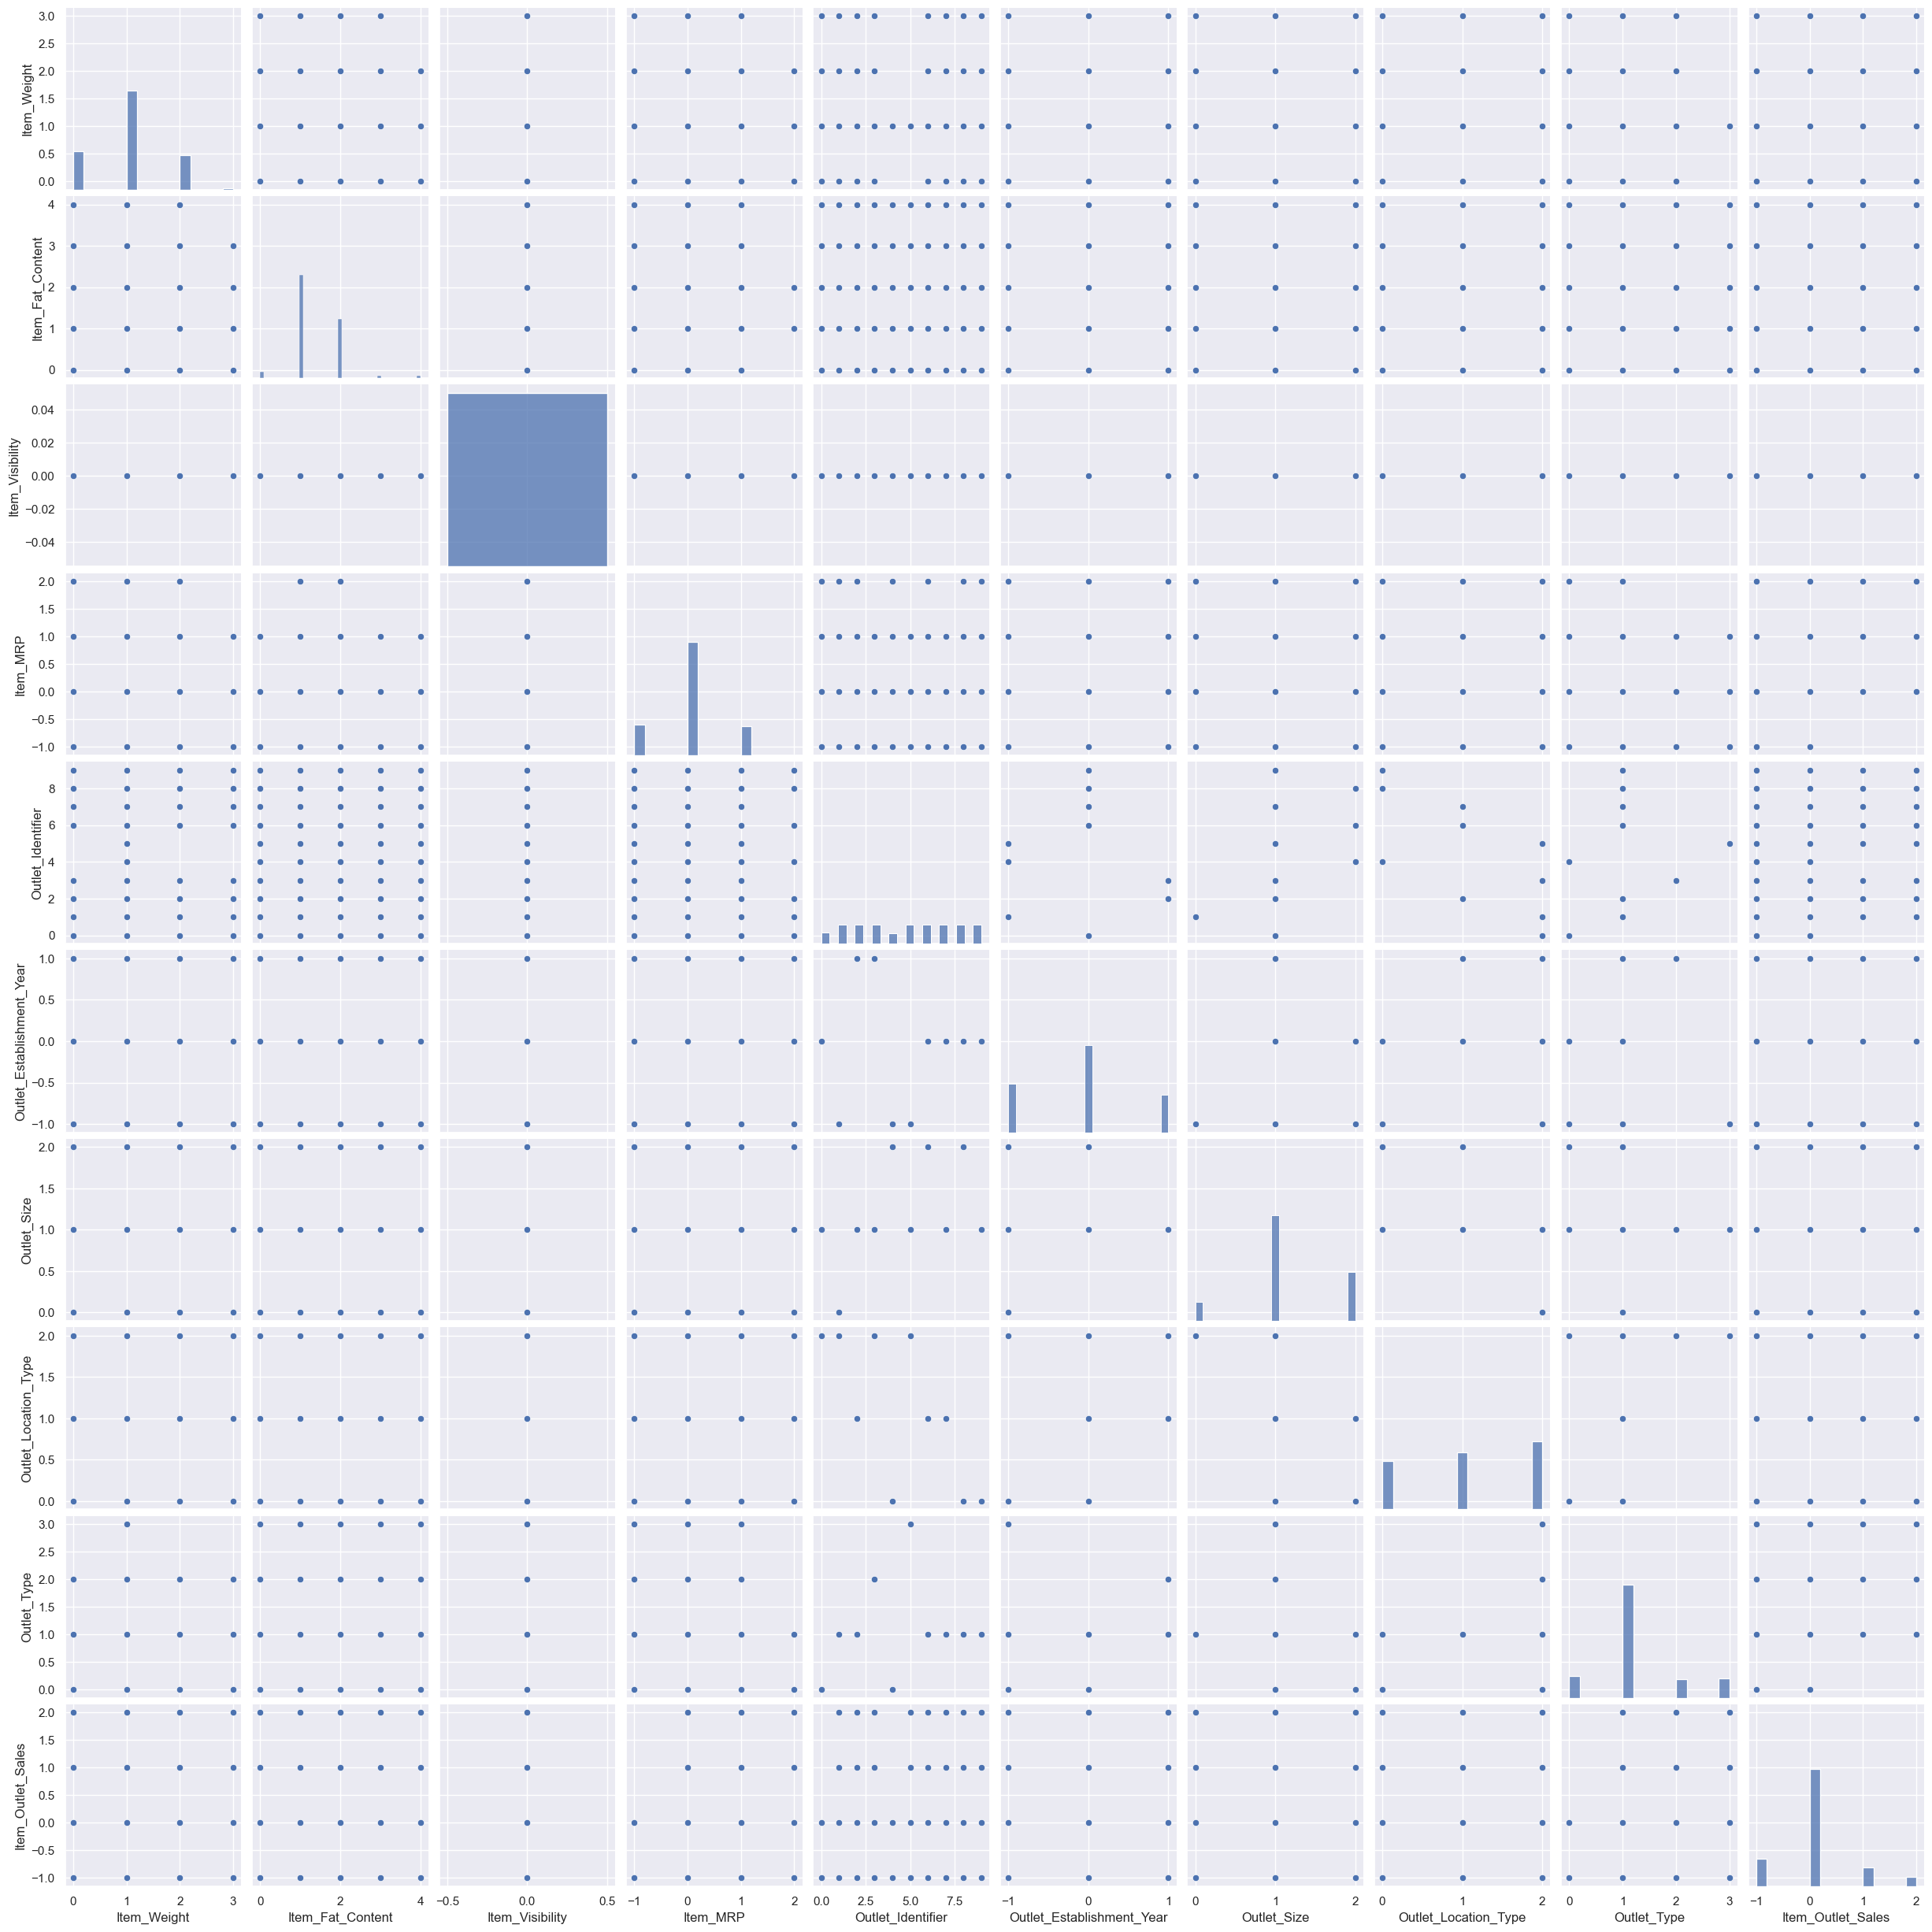

In [140]:
seaborn.pairplot(df.drop('Item_Type', axis = 1))

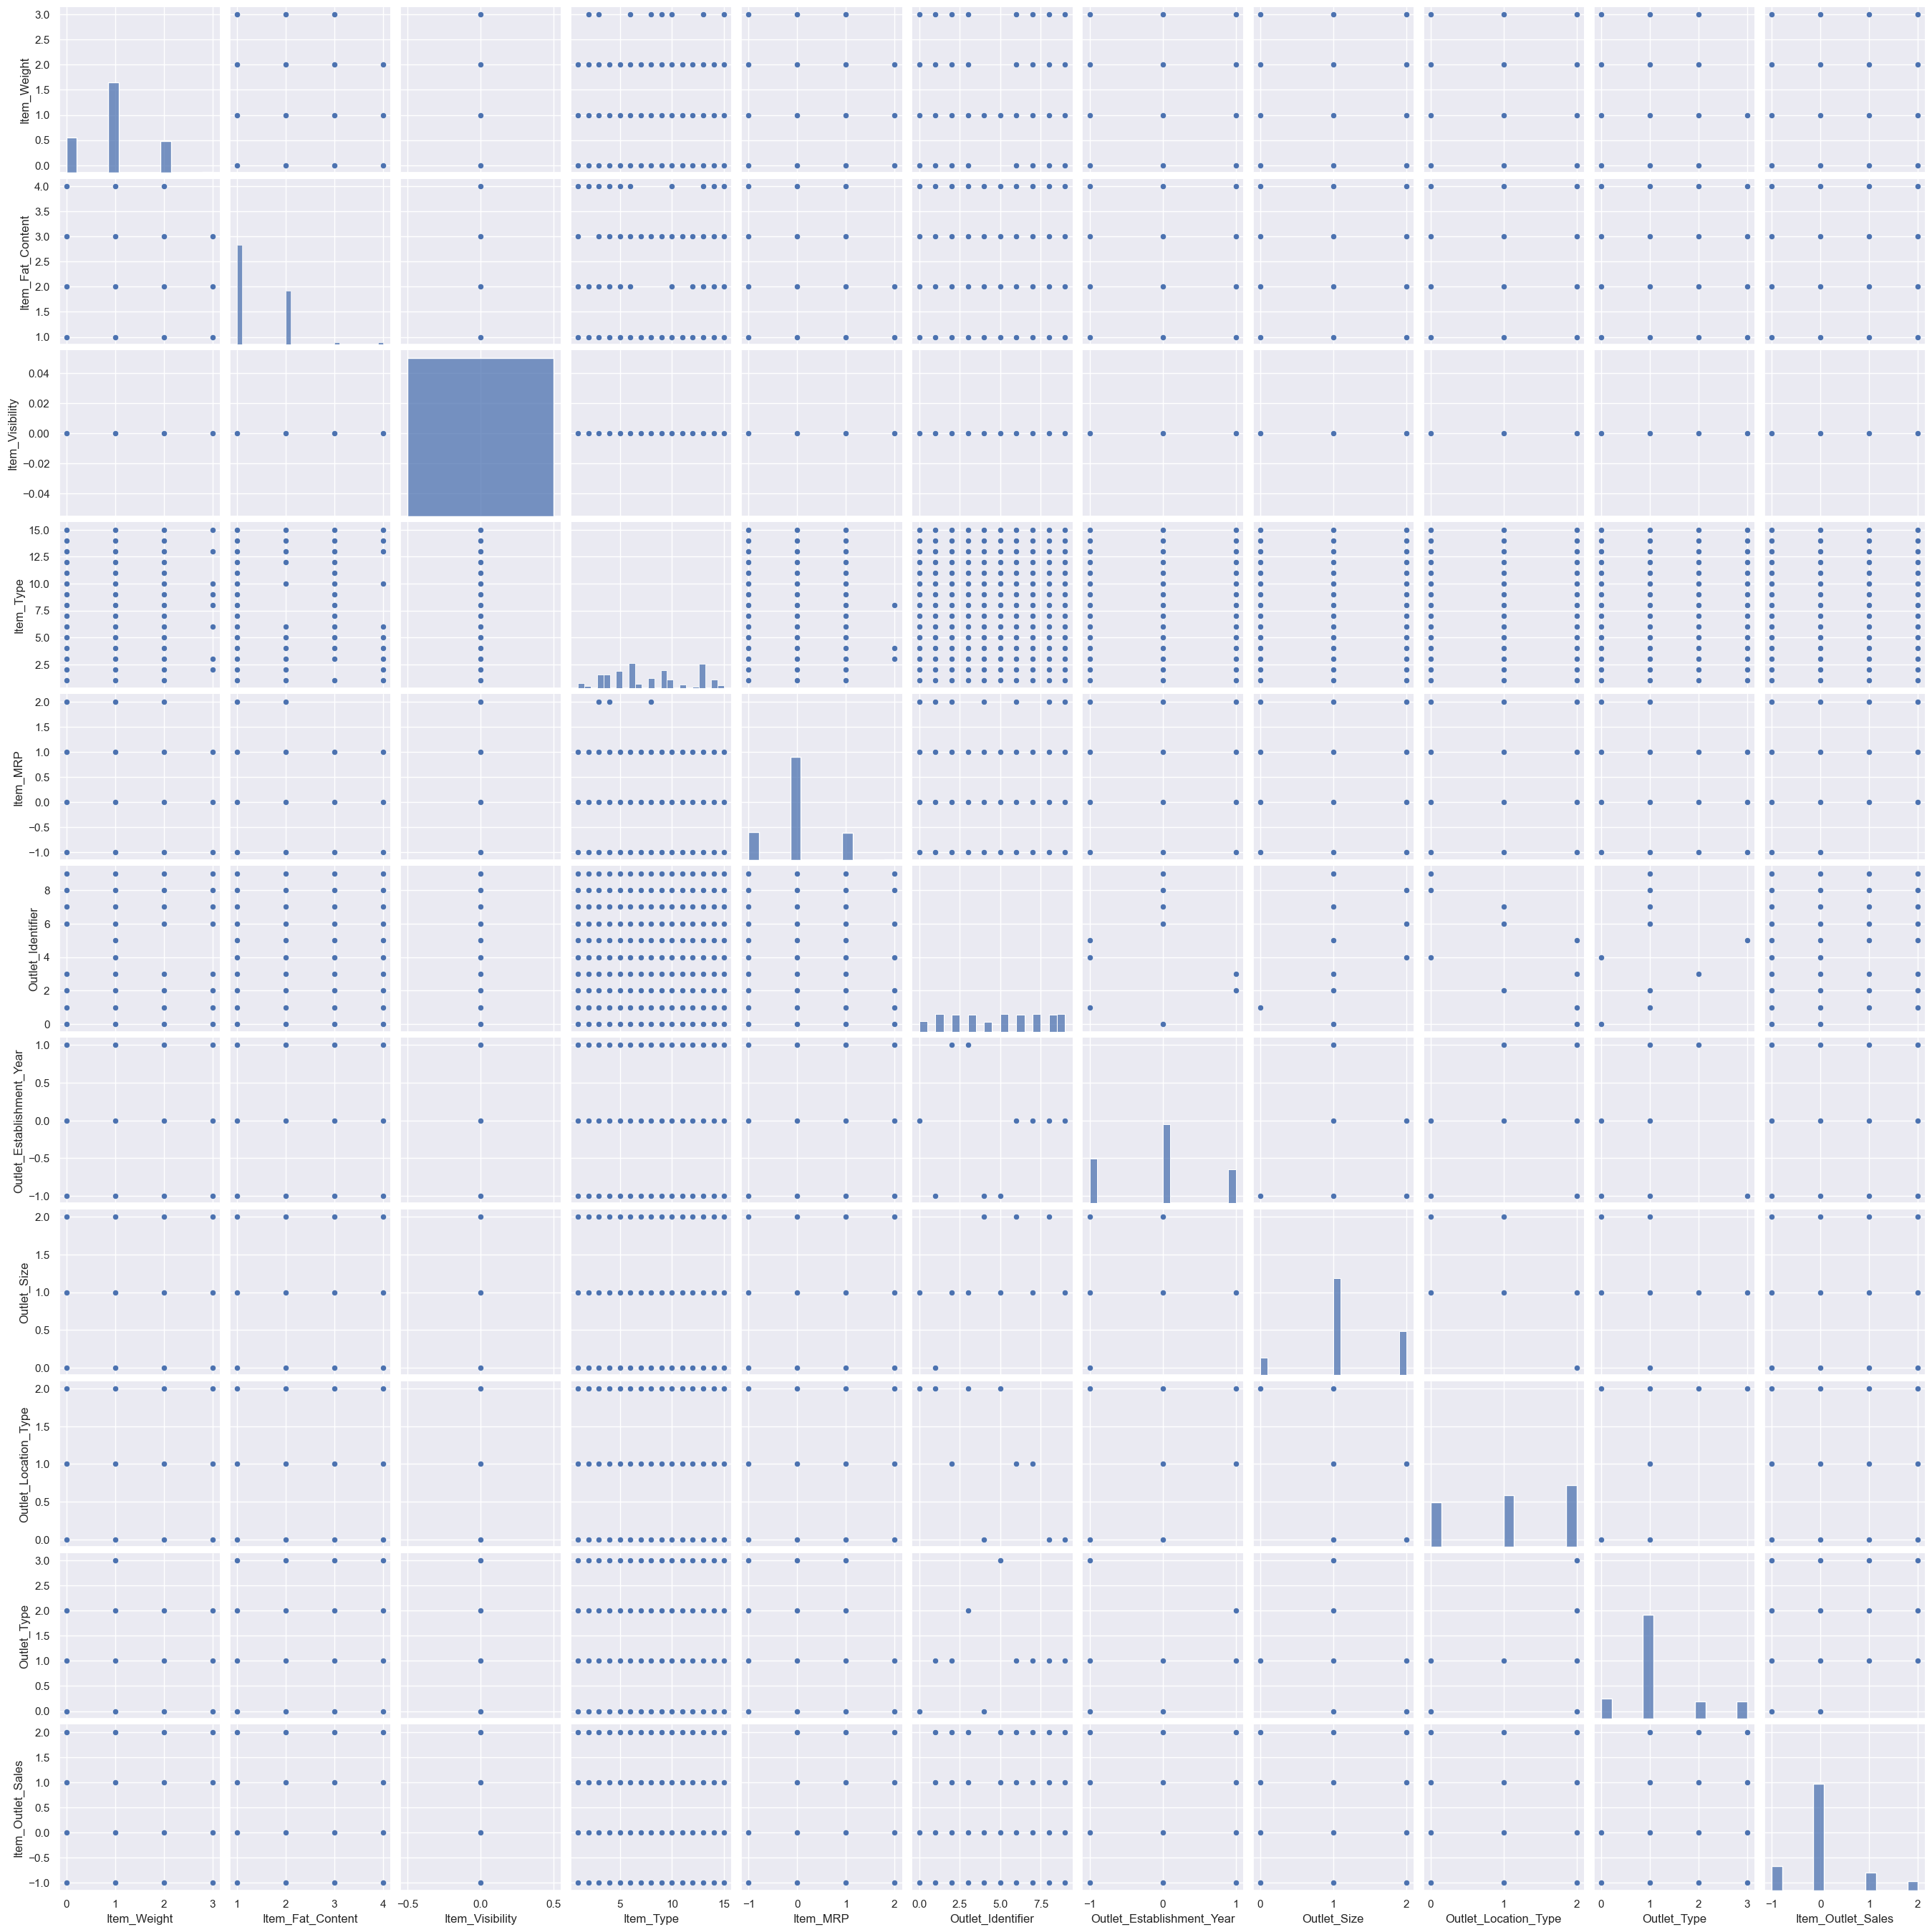

In [141]:
df = df[df['Item_Fat_Content']>0]
df = df[df['Item_Type']>0]
seaborn.pairplot(df)

<AxesSubplot:>

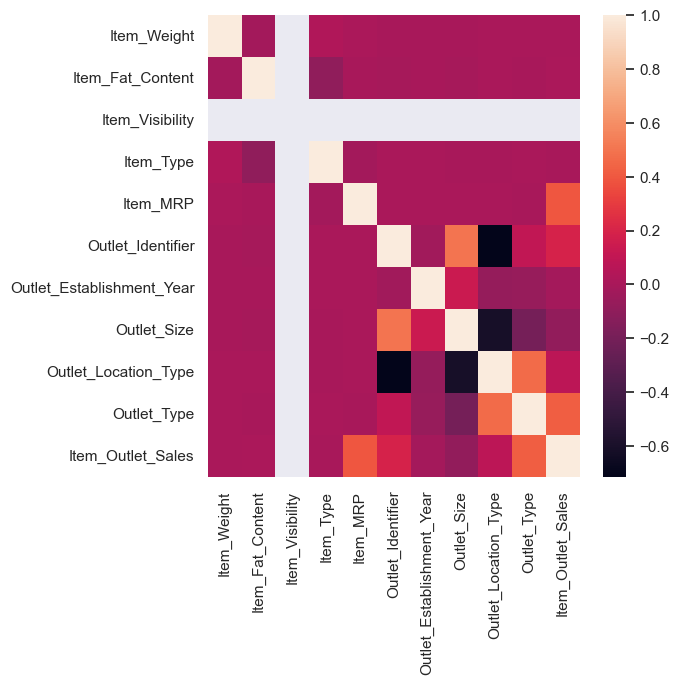

In [142]:
seaborn.heatmap(df.corr(),
                xticklabels = df.columns,
                yticklabels = df.columns)

In [150]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [151]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score